# 评估同化算法的性能


In [1]:
%load_ext autoreload
%autoreload 2

## 基本参数设置

In [2]:
# Depending on your combination of package versions, this can raise a lot of TF warnings... 
import numpy as np
import matplotlib.pyplot as plt
# import scienceplots
plt.style.use(["nature", "no-latex"])
import xarray as xr
from pathlib import Path
import pickle
import sys 
sys.path.append('../')

In [3]:
!ls /public/home/wangwuxing01/research/fundation/output

da_cycle  forecast  medium_forecast


In [4]:
fourcastnet_dir = "/public/home/wangwuxing01/research/fundation/output/forecast"

In [5]:
plot_vars = ["Z500", "T850", "T2M", "U10", "V10", "MSL", "T500", "R500", "U500", "V500"]
unit_y = ["(m$^2$ s$^{-2}$)", "(K)", "(K)", "(m s$^{-1}$)", "(m s$^{-1}$)", "(hPa)", "(K)", "(%)", "(m s$^{-1}$)", "(m s$^{-1}$)"]
plot_idx = [1, 10, 22, 20, 21, 23, 9, 5, 13, 17]

In [6]:
da_cycle_dir = "/public/home/wangwuxing01/research/fundation/output_npj/da_cycle"
medium_forecast_dir = "/public/home/wangwuxing01/research/fundation/output_npj/medium_forecast"
scaler_dir = "/public/home/wangwuxing01/research/fundation/data/era5_6_hourly/assim_dir_3day/scaler.pkl"
var_idx_dir = "/public/home/wangwuxing01/research/fundation/data/era5_6_hourly/assim_dir_3day/var_idx.npy"

In [7]:
var_idx = [k for k in np.load(var_idx_dir)]

In [8]:
plot_vars = ["Z", "T", "R", "U"]
unit_y = ["(m$^2$ s$^{-2}$)", "(K)", "(%)", "(m s$^{-1}$)"]
plot_idx = [1, 10, 22, 20, 21, 23, 9, 5, 13, 17]

In [22]:
rmse_dacycle_4dvarnet = np.load(f"{da_cycle_dir}/rmse_4dvarnet_obs[8, 9, 10, 11, 20, 21]_xb_3day.npy").astype(np.float32)
rmse_dacycle_vit = np.load(f"{da_cycle_dir}/rmse_vit_obs[8, 9, 10, 11, 20, 21]_xb_3day.npy").astype(np.float32)
rmse_dacycle_4dvarformer = np.load(f"{da_cycle_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_xb_3day.npy").astype(np.float32)

acc_dacycle_4dvarnet = np.load(f"{da_cycle_dir}/acc_4dvarnet_obs[8, 9, 10, 11, 20, 21]_xb_3day.npy").astype(np.float32)
acc_dacycle_vit = np.load(f"{da_cycle_dir}/acc_vit_obs[8, 9, 10, 11, 20, 21]_xb_3day.npy").astype(np.float32)
acc_dacycle_4dvarformer = np.load(f"{da_cycle_dir}/acc_4dvarformer_obs[8, 9, 10, 11, 20, 21]_xb_3day.npy").astype(np.float32)

In [23]:
rmse_4dvarnet = np.mean(np.mean(rmse_dacycle_4dvarnet, axis=0)[::4], axis=0)
rmse_vit = np.mean(np.mean(rmse_dacycle_vit, axis=0)[::4], axis=0)
rmse_4dvarformer = np.mean(np.mean(rmse_dacycle_4dvarformer, axis=0)[::4], axis=0)

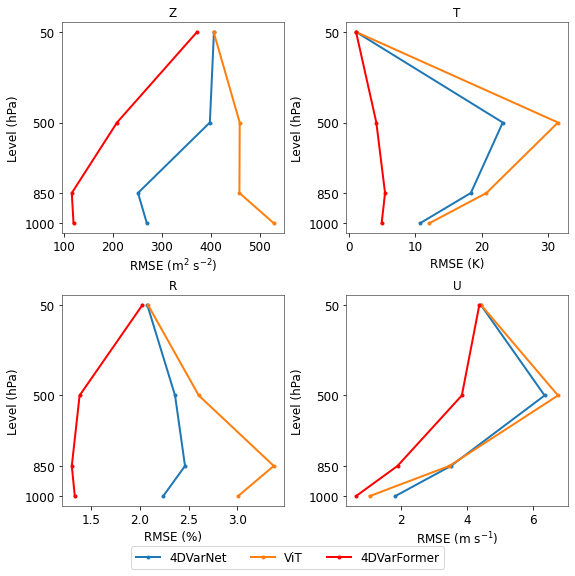

In [24]:
fig = plt.figure(figsize=(8, 8))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    plt.title(plot_vars[i], fontsize=12)
    ax.plot(np.flipud(rmse_4dvarnet[4*i:4*(i+1)]), [1000, 850, 500, 50], linewidth=2, 
            marker="o", markersize=3, label=f"4DVarNet")
    ax.plot(np.flipud(rmse_vit[4*i:4*(i+1)]), [1000, 850, 500, 50], linewidth=2, 
            marker="o", markersize=3, label=f"ViT")
    ax.plot(np.flipud(rmse_4dvarformer[4*i:4*(i+1)]), [1000, 850, 500, 50], linewidth=2, 
            color='r', marker="o", markersize=3, label=f"4DVarFormer")
    ax.set_yticks([1000, 850, 500, 50])
    plt.gca().invert_yaxis()
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    plt.xlabel(f"RMSE {unit_y[i]}", fontsize=12)
    plt.ylabel("Level (hPa)", fontsize=12)
        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=3, loc='lower center', bbox_to_anchor=(0.5, 0), fontsize=12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.12)
plt.savefig(f'da_cycle_profile.jpg',dpi=300)
plt.savefig(f'da_cycle_profile.pdf',dpi=300)
plt.show()

In [13]:
rmse_dacycle_4dvarnet_temp = np.load(f"{da_cycle_dir}/rmse_4dvarnet_obs[8, 9, 10, 11]_xb_3day.npy").astype(np.float32)
rmse_dacycle_vit_temp = np.load(f"{da_cycle_dir}/rmse_vit_obs[8, 9, 10, 11]_xb_3day.npy").astype(np.float32)
rmse_dacycle_4dvarformer_temp = np.load(f"{da_cycle_dir}/rmse_4dvarformer_obs[8, 9, 10, 11]_xb_3day.npy").astype(np.float32)

acc_dacycle_4dvarnet_temp = np.load(f"{da_cycle_dir}/acc_4dvarnet_obs[8, 9, 10, 11]_xb_3day.npy").astype(np.float32)
acc_dacycle_vit_temp = np.load(f"{da_cycle_dir}/acc_vit_obs[8, 9, 10, 11]_xb_3day.npy").astype(np.float32)
acc_dacycle_4dvarformer_temp = np.load(f"{da_cycle_dir}/acc_4dvarformer_obs[8, 9, 10, 11]_xb_3day.npy").astype(np.float32)

In [14]:
rmse_4dvarnet_temp = np.mean(np.mean(rmse_dacycle_4dvarnet_temp, axis=0)[::4], axis=0)
rmse_vit_temp = np.mean(np.mean(rmse_dacycle_vit_temp, axis=0)[::4], axis=0)
rmse_4dvarformer_temp = np.mean(np.mean(rmse_dacycle_4dvarformer_temp, axis=0)[::4], axis=0)

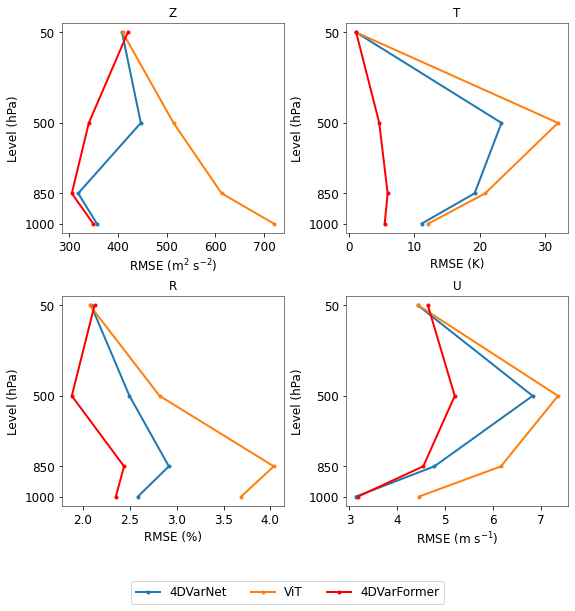

In [15]:
fig = plt.figure(figsize=(8, 8))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    plt.title(plot_vars[i], fontsize=12)
    ax.plot(np.flipud(rmse_4dvarnet_temp[4*i:4*(i+1)]), [1000, 850, 500, 50], linewidth=2, 
            marker="o", markersize=3, label=f"4DVarNet")
    ax.plot(np.flipud(rmse_vit_temp[4*i:4*(i+1)]), [1000, 850, 500, 50], linewidth=2, 
            marker="o", markersize=3, label=f"ViT")
    ax.plot(np.flipud(rmse_4dvarformer_temp[4*i:4*(i+1)]), [1000, 850, 500, 50], color='r', linewidth=2, 
            marker="o", markersize=3, label=f"4DVarFormer")
    ax.set_yticks([1000, 850, 500, 50])
    plt.gca().invert_yaxis()
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    plt.xlabel(f"RMSE {unit_y[i]}", fontsize=12)
    plt.ylabel("Level (hPa)", fontsize=12)
        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=3, loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.12)
plt.savefig(f'da_cycle_profile_temp.jpg',dpi=300)
plt.savefig(f'da_cycle_profile_temp.pdf',dpi=300)
plt.show()

In [16]:
rmse_dacycle_4dvarnet_wind = np.load(f"{da_cycle_dir}/rmse_4dvarnet_obs[20, 21]_xb_3day.npy").astype(np.float32)
rmse_dacycle_vit_wind = np.load(f"{da_cycle_dir}/rmse_vit_obs[20, 21]_xb_3day.npy").astype(np.float32)
rmse_dacycle_4dvarformer_wind = np.load(f"{da_cycle_dir}/rmse_4dvarformer_obs[20, 21]_xb_3day.npy").astype(np.float32)

acc_dacycle_4dvarnet_wind = np.load(f"{da_cycle_dir}/acc_4dvarnet_obs[20, 21]_xb_3day.npy").astype(np.float32)
acc_dacycle_vit_wind = np.load(f"{da_cycle_dir}/acc_vit_obs[20, 21]_xb_3day.npy").astype(np.float32)
acc_dacycle_4dvarformer_wind = np.load(f"{da_cycle_dir}/acc_4dvarformer_obs[20, 21]_xb_3day.npy").astype(np.float32)

In [17]:
rmse_4dvarnet_wind = np.mean(np.mean(rmse_dacycle_4dvarnet_wind, axis=0)[::4], axis=0)
rmse_vit_wind = np.mean(np.mean(rmse_dacycle_vit_wind, axis=0)[::4], axis=0)
rmse_4dvarformer_wind = np.mean(np.mean(rmse_dacycle_4dvarformer_wind, axis=0)[::4], axis=0)

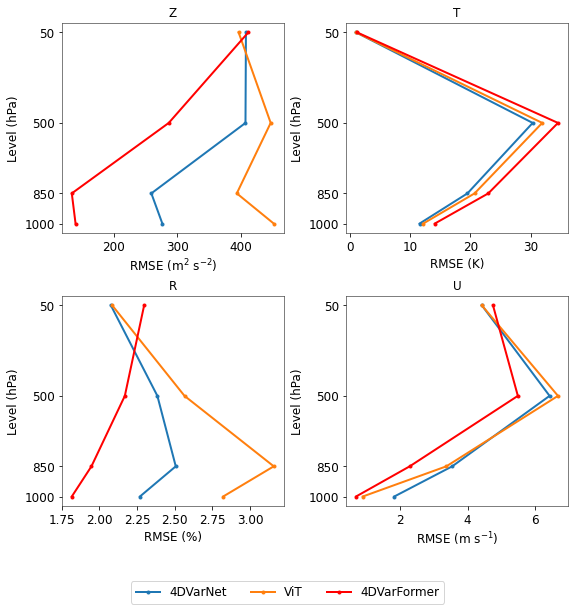

In [18]:
fig = plt.figure(figsize=(8, 8))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    plt.title(plot_vars[i], fontsize=12)
    ax.plot(np.flipud(rmse_4dvarnet_wind[4*i:4*(i+1)]), [1000, 850, 500, 50], linewidth=2, 
            marker="o", markersize=3, label=f"4DVarNet")
    ax.plot(np.flipud(rmse_vit_wind[4*i:4*(i+1)]), [1000, 850, 500, 50], linewidth=2, 
            marker="o", markersize=3, label=f"ViT")
    ax.plot(np.flipud(rmse_4dvarformer_wind[4*i:4*(i+1)]), [1000, 850, 500, 50], color='r', linewidth=2, 
            marker="o", markersize=3, label=f"4DVarFormer")
    ax.set_yticks([1000, 850, 500, 50])
    plt.gca().invert_yaxis()
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    plt.xlabel(f"RMSE {unit_y[i]}", fontsize=12)
    plt.ylabel("Level (hPa)", fontsize=12)
        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=3, loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.12)
plt.savefig(f'da_cycle_profile_wind.jpg',dpi=300)
plt.savefig(f'da_cycle_profile_wind.pdf',dpi=300)
plt.show()

In [19]:
rmse_4dvarformer_3day = np.load(f"{da_cycle_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_xb_3day.npy").astype(np.float32)
rmse_4dvarformer_4day = np.load(f"{da_cycle_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_xb_4day.npy").astype(np.float32)
rmse_4dvarformer_5day = np.load(f"{da_cycle_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_xb_5day.npy").astype(np.float32)

In [20]:
rmse_4dvarformer_3day = np.mean(np.mean(rmse_4dvarformer_3day, axis=0)[::4], axis=0)
rmse_4dvarformer_4day = np.mean(np.mean(rmse_4dvarformer_4day, axis=0)[::4], axis=0)
rmse_4dvarformer_5day = np.mean(np.mean(rmse_4dvarformer_5day, axis=0)[::4], axis=0)

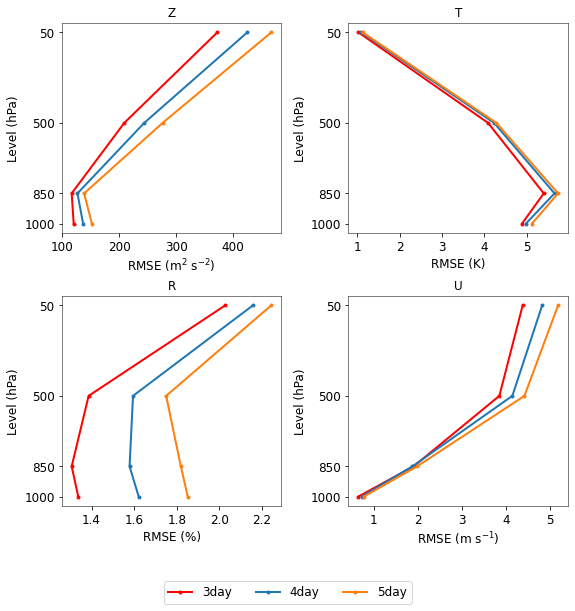

In [21]:
fig = plt.figure(figsize=(8, 8))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    plt.title(plot_vars[i], fontsize=12)
    ax.plot(np.flipud(rmse_4dvarformer_3day[4*i:4*(i+1)]), [1000, 850, 500, 50], color='r', linewidth=2, 
            marker="o", markersize=3, label=f"3day")
    ax.plot(np.flipud(rmse_4dvarformer_4day[4*i:4*(i+1)]), [1000, 850, 500, 50], linewidth=2, 
            marker="o", markersize=3, label=f"4day")
    ax.plot(np.flipud(rmse_4dvarformer_5day[4*i:4*(i+1)]), [1000, 850, 500, 50], linewidth=2, 
            marker="o", markersize=3, label=f"5day")
    ax.set_yticks([1000, 850, 500, 50])
    plt.gca().invert_yaxis()
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    plt.xlabel(f"RMSE {unit_y[i]}", fontsize=12)
    plt.ylabel("Level (hPa)", fontsize=12)
        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=3, loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.12)
plt.savefig(f'da_cycle_profile_xb.jpg',dpi=300)
plt.savefig(f'da_cycle_profile_xb.pdf',dpi=300)
plt.show()